# NISHIKANT GURAV

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION

### #GRIPJULY21 #TSF #DATASCIENCE

#### DATASET : SAMPLESUPERSTORE.CSV (https://bit.ly/w-data)

# TASK 1

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of
hours they studied. This is a simple linear regression task as it involves just two variables.

# Prediction using Supervised ML

# Simple Linear Rgression

### In simple linear regression we have 1 dependent and 1 independent variable.
###  major assumptions of linear regression includes that the error terms or residuals are normally distributed.
### residuals are the difference between actual and predicted value.

# Step 1: Reading and Understanding the Data

In [114]:
# Importing all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [115]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [179]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2: Visualising the Data

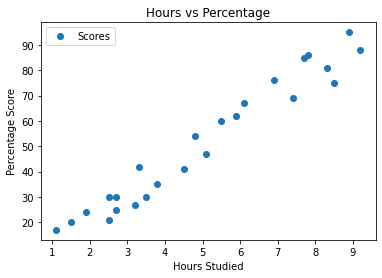

In [11]:
# y = mX + C
#i.e. y = B1X + B0
#lets plot the the graph between independent and dependent variable.
df.plot(x="Hours",y="Scores",style='o')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')  
plt.show()

we will clearly see from the graph above, there is a strong correlation between 2 variables Hours studied and score 

#Lets Check with seaborn's inbuilt regplot to show the best fit line later we will check it by plotting manually 

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

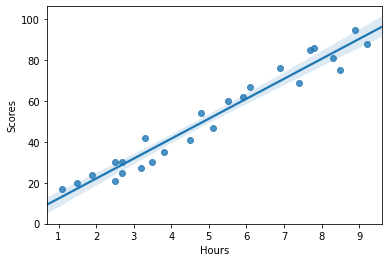

In [12]:
sns.regplot(x='Hours',y='Scores',data=df)

# Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Hours$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Score`, to the variable `y`.

In [152]:
X = df['Hours']
y = df['Scores']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [17]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [18]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [58]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [94]:
X_train_sm.head()

,const,Hours
6,1.0,9.2
12,1.0,4.5
4,1.0,3.5
24,1.0,7.8
0,1.0,2.5


In [59]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [21]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.15e-11
Time:                        18:19:58   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Hours is 9.8717, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is  0.957
Meaning that 95.7% of the variance in `Sores` is explained by `Hours`

This is a very decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 1.4951 + 9.8717 \times Hours $

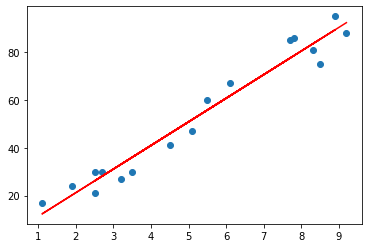

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 +9.8717*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
y_train_pred = lr.predict(X_train_sm)
residual = (y_train - y_train_pred)

In [92]:
y_train_pred[:5]

6     92.314915
12    45.917857
4     36.046143
24    78.494515
0     26.174428
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([92.31491485, 45.91785704, 36.04614261, 78.49451465, 26.17442818,
       51.84088569, 28.14877107, 12.35402798, 20.25139952, 61.71260012])

In [80]:
residual

6     -4.314915
12    -4.917857
4     -6.046143
24     7.505485
0     -5.174428
1     -4.840886
20     1.851229
14     4.645972
17     3.748600
18     5.287400
2     -6.084628
10     7.492657
16     3.825572
15     5.646599
7      4.210429
3    -10.404715
8     -2.430372
dtype: float64

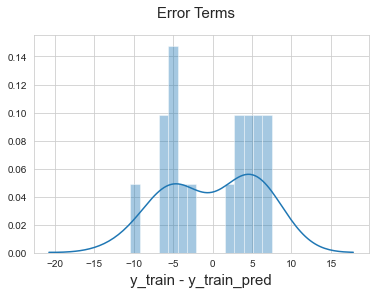

In [30]:
fig = plt.figure()
sns.distplot(residual, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

<AxesSubplot:>

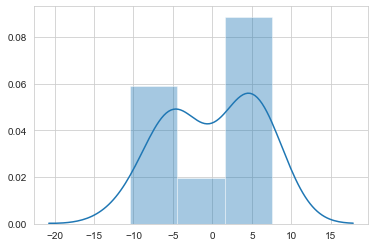

In [29]:
sns.set_style('whitegrid')
sns.distplot(residual)

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

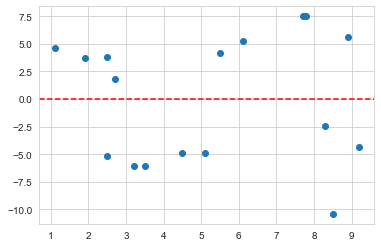

In [31]:
#Looking for patterns in the residuals
plt.scatter(X_train,residual)
plt.axhline(y=0,color='r',ls='--')
plt.show()

there is no significant pattern as all the residual are scattered around y=0 i.e.mean of residuals is zero.
so the model is good enough .

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [81]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

In [86]:
X_test_sm.head()

,const,Hours
9,1.0,2.7
22,1.0,3.8
13,1.0,3.3
11,1.0,5.9
5,1.0,1.5


In [85]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


# Model Building Using sklearn's linear regression module

In [180]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [182]:
from sklearn.linear_model import LinearRegression  
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
y_pred = lr_model.predict(X_test) # Predicting the scores

In [184]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


## What will be the predicted score if the students studies 9.25 hrs/day

In [185]:
# You can also test with your own data
hours = [[9.25]]
own_pred = lr_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.80850057353504


# Model Evaluation

In [186]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [187]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))


0.9570735354094693
0.9309458862687437


In [188]:
print(mean_absolute_error(y_train,y_train_pred))
print(mean_absolute_error(y_test,y_test_pred))

5.20164038517102
4.762517892332275


In [189]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

30.852690885666128
25.678419573283865


In [190]:
# RMSE
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

5.55451986094803
5.0673878451608445
